In [124]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
import h5py
import random
import pickle as pkl
import os
import torch
sys.path.append('/extra/yadongl10/BIG_sandbox/SparseImageFlows')
import data_loader
import imp
imp.reload(data_loader)
# from flow import PixelwiseGenerator
from torch.distributions import Normal, Bernoulli
import h5py
import numpy as np
import utils
from data_loader import load_LAGAN, load_data_LAGAN
from plot_utils import discrete_mass, discrete_pt, tau21, _tau1, _tau2
img_dir = "/baldig/physicsprojects/lagan"


In [2]:
# config = {
#         "batch_size": 512,
#         "epochs": 30,
#         "initial_lr": 0.001,
#         "lr_decay": 0.999,
#         "flow_length": 16,
#         "name": "planar",
#         "width": 25,
#         "save_result_intervel": 1
#     }

In [3]:
# device = 'cuda'
# model = PixelwiseGenerator(base_dim=32, img_dim=25 ** 2).to(device)
# def load_pretrained(subset='signal'):
#     path = '/extra/yadongl10/BIG_sandbox/SparseImageFlows_result/LAGAN_pixelwise/'+subset
#     print('Load model from path', path)
#     checkpoint = torch.load(path+'/best_checkpoints.pt')
#     model.load_state_dict(checkpoint)
#     return model
# # model_sg = load_pretrained(subset='signal')
# model_bg = load_pretrained(subset='background')


Load model from path /extra/yadongl10/BIG_sandbox/SparseImageFlows_result/LAGAN_pixelwise/background


In [13]:
# numsamples = 10000
# noisesamples = Normal(loc=0, scale=1).sample([numsamples, 32]).cuda()
# noisesamples_beta = Normal(loc=0, scale=1).sample([numsamples, 1,
#                                                    25, 25]).cuda()
# pi, beta, std = model_bg(noisesamples, noisesamples_beta)
# std.max()

tensor(2.9258, device='cuda:0', grad_fn=<MaxBackward1>)

In [5]:
# def get_samples(model, config):
#     numsamples = 10000
#     noisesamples = Normal(loc=0, scale=1).sample([numsamples, 32]).cuda()
#     noisesamples_beta = Normal(loc=0, scale=1).sample([numsamples, 1,
#                                                        25, 25]).cuda()
#     pi, beta, std = model(noisesamples, noisesamples_beta)

#     sample = utils.get_img_sample(config, pi, beta, std)
#     print('std.max', std.max().tolist(), 'img.max', sample.max())
#     return sample
# # samples_sg = get_samples(model_sg, config)
# samples_bg = get_samples(model_bg, config)


std.max 2.9355454444885254 img.max 13.2397


In [10]:
# samples_bg = np.exp(samples_bg[samples_bg>0])

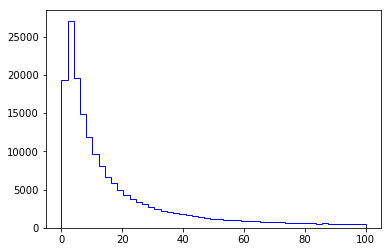

In [11]:
# _, bins, _ = plt.hist(samples_bg.ravel(),  # to make sure have same amount of samples
#            bins=np.linspace(0,100,50), histtype='step', label='Generated bg', color='blue')

# Separate sg/bg

In [225]:
# img_dir = "/baldig/physicsprojects/lagan"
# num = 10000
# with h5py.File(img_dir+'/lagan-jet-images.hdf5', 'r') as f:
#     image = np.asarray(f['image'][:num,:,:])
#     real_labels = np.asarray(f['signal'][:num])
# image_bg  = image[real_labels==0]
# image_sg  = image[real_labels==1]
# print(image_bg.shape, image_sg.shape)

(4374, 25, 25) (5626, 25, 25)


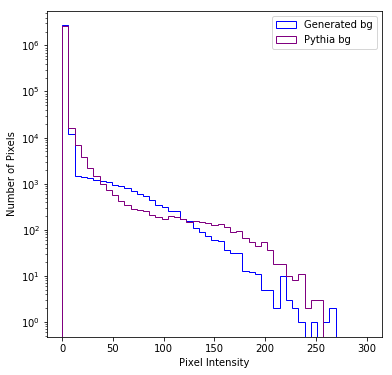

In [9]:
# fig, ax = plt.subplots(figsize=(6, 6))
# _, bins, _ = plt.hist(samples_bg[:image_bg.shape[0]].ravel(),  # to make sure have same amount of samples
#            bins=np.linspace(0,300,50), histtype='step', label='Generated bg', color='blue')
# # _, bins, _ = plt.hist(samples_sg[:image_sg.shape[0]].ravel(), 
# #            bins=np.linspace(0,500,50), histtype='step', label='Generated sg', color='blue', linestyle='dashed')

# _, bins, _ = plt.hist(image_bg.ravel(), 
#            bins=np.linspace(0,300,50), histtype='step', label='Pythia bg', color='purple')
# # _, bins, _ = plt.hist(image_sg.ravel(), 
# #            bins=np.linspace(0,300,50), histtype='step', label='Pythia sg', color='purple', linestyle='dashed')

# plt.xlabel('Pixel Intensity')
# plt.ylabel('Number of Pixels')
# plt.yscale('log')
# plt.legend(loc='upper right')

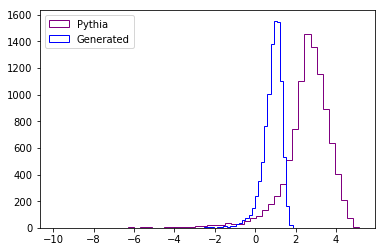

In [8]:
# # log scale
# px = 12
# py = 13
# pixel_vector = image[:,px, py]
# pixel_vector_sg = samples_bg[:, px, py]
# _, bins, _ = plt.hist(np.log(pixel_vector[pixel_vector>0]).ravel(), 
#            bins=50, histtype='step', label='Pythia', color='purple')
# _, bins, _ = plt.hist(np.log(pixel_vector_sg[pixel_vector_sg>0]).ravel(), 
#            bins=50, histtype='step', label='Generated', color='blue')
# plt.legend()

In [2]:
# # original scale
# px = 12
# py = 12
# pixel_vector = image_bg[:,px, py]
# pixel_vector_sg = samples_bg[:, px, py]
# _, bins, _ = plt.hist(pixel_vector[pixel_vector>0].ravel(), 
#            bins=50, histtype='step', label='Pythia', color='purple')
# _, bins, _ = plt.hist(pixel_vector_sg[pixel_vector_sg>0].ravel(), 
#            bins=50, histtype='step', label='Generated', color='blue')
# plt.legend()

# Gamma model

In [377]:
# img_dir = "/baldig/physicsprojects/lagan"
# with h5py.File(img_dir+'/lagan-jet-images.hdf5', 'r') as f:
#     image = np.asarray(f['image'][:1000,:,:])
    
image = load_data_LAGAN(subset='signal')
# image = image[:1000]

(436333, 25, 25) (436333, 25, 25)
return signal


In [1196]:
with open('/extra/yadongl10/BIG_sandbox/SparseImageFlows_result/jet_smaf' + '/img_sample_85.pkl', 'rb') as f:
    x = pkl.load(f)
samples_bg = np.asarray(x).reshape(-1, 25, 25)

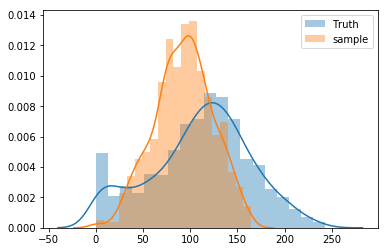

In [1195]:
from scipy.stats import gamma

x=12
y=12
pixel_bg = samples_bg[:,x,y]
pixel_bg = pixel_bg[pixel_bg>=0]
pixel = image[:,x,y]
pixel = pixel[pixel>=0]
x = np.linspace(0.0,200, 1000)
# plt.plot(x, gamma.pdf(x, a = 15, scale = 1))
sns.distplot(pixel, label='Truth')
sns.distplot(pixel_bg, label='sample')
plt.legend()



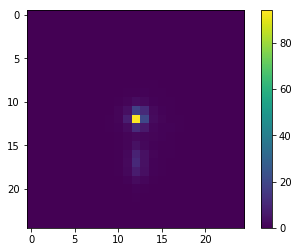

In [898]:
plt.imshow(samples_bg.mean(axis=0))
plt.colorbar()

# truncated normal model

## Load data

In [3]:
# with open('/extra/yadongl10/BIG_sandbox/SparseImageFlows_result/jet_peter_smaf' + '/MixNorm_img_sample_400.pkl', 'rb') as f:
#     x = pkl.load(f)
# samples_bg = np.asarray(x).reshape(-1, 25, 25)


num = 20000
image = load_LAGAN(num=3*num, signal=1)[:num]
img_dir = "/baldig/physicsprojects/lagan"
with h5py.File(img_dir+'/lagan_data.h5', 'r') as f:
    samples_lagan = np.asarray(f['lagan_generated_signal_images'][:num,:,:])
    
print('real', image.shape)   
print('lagan', samples_lagan.shape)
# print('ours', samples_bg.shape)



(21099, 25, 25) (38901, 25, 25)
return signal
real (20000, 25, 25)
lagan (20000, 25, 25)


## all data

In [7]:
# # all data set 
# image = load_data_LAGAN(subset='signal')
# with h5py.File(img_dir+'/lagan_data.h5', 'r') as f:
#     samples_lagan = np.asarray(f['lagan_generated_signal_images'])
# print('samples lagan shape', samples_lagan.shape)    

(436333, 25, 25) (436333, 25, 25)
return signal
samples lagan shape (20000, 25, 25)


In [4]:
import sys
sys.path.append('/extra/yadongl10/BIG_sandbox/SparseImageFlows/SMAF')
# imp.reload(mixflows)
import mixflows as fnn

num_inputs = 625
num_hidden = 1024
num_cond_inputs = None
modules = [fnn.MixtureNormalMADE(num_inputs, num_hidden, num_cond_inputs, act='sigmoid')]
model = fnn.FlowSequential(*modules)
# print(model)
path = '/extra/yadongl10/BIG_sandbox/SparseImageFlows_result/jet_peter_smaf'
checkpoint = torch.load(path + '/Pjet_model_500.pt')
model.load_state_dict(checkpoint)

model.to('cuda')

FlowSequential(
  (0): MixtureNormalMADE(
    (joiner): MaskedLinear(
      (linear): Linear(in_features=625, out_features=1024, bias=True)
    )
    (trunk): Sequential(
      (0): Sigmoid()
      (1): MaskedLinear(
        (linear): Linear(in_features=1024, out_features=1024, bias=True)
      )
      (2): Sigmoid()
      (3): MaskedLinear(
        (linear): Linear(in_features=1024, out_features=1024, bias=True)
      )
      (4): Sigmoid()
      (5): MaskedLinear(
        (linear): Linear(in_features=1024, out_features=1875, bias=True)
      )
    )
    (ParameterFilter): ParameterFilter(
      (AffineTransform_gamma): AffineTransform(
        (ElementWiseLinear_weight): ElementWiseLinear(
          (conv): Conv1d(2, 1, kernel_size=(1,), stride=(1,))
        )
        (ElementWiseLinear_bias): ElementWiseLinear(
          (conv): Conv1d(2, 1, kernel_size=(1,), stride=(1,))
        )
      )
      (AffineTransform_mu): AffineTransform(
        (ElementWiseLinear_weight): ElementWiseLi

In [5]:
samples_bg = model.sample(num_samples=20000, input_size=625).view(-1, 25, 25)
samples_bg[samples_bg<0] = 0
samples_bg = samples_bg.cpu().numpy()
print(samples_bg.shape)

(20000, 25, 25)


## Compute distance

In [47]:
from scipy.stats import wasserstein_distance
# distance of pt 
print('ours pt distance', wasserstein_distance(discrete_pt(image[:20000]), discrete_pt(samples_bg)))
print('lagan pt distance', wasserstein_distance(discrete_pt(image[:20000]), discrete_pt(samples_lagan)))

ours pt distance 3.08118621417
lagan pt distance 3.27705354424


In [48]:
# distance of mass 
print(wasserstein_distance(discrete_mass(image[:20000]), discrete_mass(samples_bg)))
print(wasserstein_distance(discrete_mass(image[:20000]), discrete_mass(samples_lagan)))

2.05144878609
1.47042105251


In [43]:
samples_lagan.shape

(20000, 25, 25)

# Mass

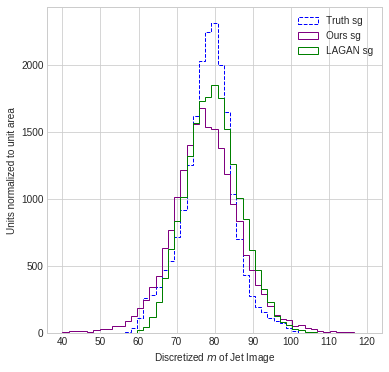

In [88]:
fig, ax = plt.subplots(figsize=(6, 6))
bins = np.linspace(40, 120, 50)
mass_image, _, _ = plt.hist(discrete_mass(image[:20000]), 
             bins=bins, histtype='step', label=r'Truth sg', normed=False, color='blue', linestyle='dashed')
mass_samples, _, _ = plt.hist(discrete_mass(samples_bg), 
             bins=bins, histtype='step', label=r'Ours sg', normed=False, color='purple', linestyle='solid')
mass_lagan, _, _ = plt.hist(discrete_mass(samples_lagan), 
             bins=bins, histtype='step', label=r'LAGAN sg', normed=False, color='green', linestyle='solid')
plt.xlabel(r'Discretized $m$ of Jet Image')
plt.ylabel(r'Units normalized to unit area')
plt.legend()
# plt.ylim(0, 0.11)


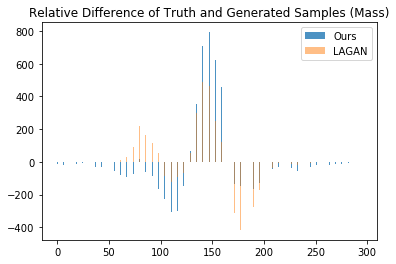

In [69]:
plt.bar(bins[:-1], mass_image - mass_samples, label='Ours',alpha=0.8)
plt.bar(bins[:-1], mass_image - mass_lagan, label='LAGAN',alpha=0.5)
plt.legend()
plt.title('Relative Difference of Truth and Generated Samples (Mass)')

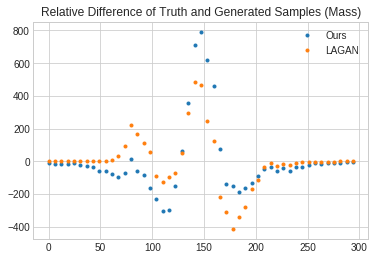

In [117]:
plt.plot(bins[:-1], mass_image - mass_samples, '.', label='Ours')
plt.plot(bins[:-1], mass_image - mass_lagan, '.', label='LAGAN')
# plt.
plt.legend()
plt.title('Relative Difference of Truth and Generated Samples (Mass)')

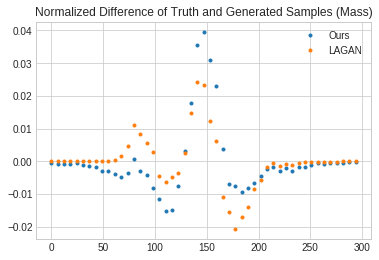

In [138]:
plt.plot(bins[:-1], (mass_image - mass_samples)/np.sum(mass_image), '.', label='Ours')
plt.plot(bins[:-1], (mass_image - mass_lagan)/np.sum(mass_image), '.', label='LAGAN')
# plt.
plt.legend()
# plt.ylim(-2,1)
plt.title('Normalized Difference of Truth and Generated Samples (Mass)')




# Pt

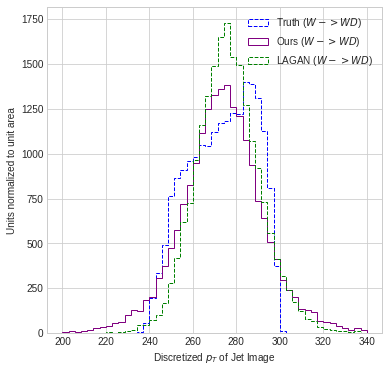

In [87]:
fig, ax = plt.subplots(figsize=(6, 6))
bins = np.linspace(200, 340, 50)

pt_image, _, _ = plt.hist(discrete_pt(image[:20000]), 
             bins=bins, histtype='step', label=r'Truth ($W->WD$)', normed=False, color='blue', linestyle='dashed')
pt_samples, _, _ = plt.hist(discrete_pt(samples_bg), 
             bins=bins, histtype='step', label=r'Ours ($W->WD$)', normed=False, color='purple')
pt_lagan, _, _ = plt.hist(discrete_pt(samples_lagan), 
             bins=bins, histtype='step', label=r'LAGAN ($W->WD$)', normed=False, color='green', linestyle='dashed')
plt.xlabel(r'Discretized $p_T$ of Jet Image')
plt.ylabel(r'Units normalized to unit area')
plt.legend()
# plt.ylim(0, 0.045)


In [56]:
pt_ours = discrete_pt(samples_bg)
mass_ours = discrete_mass(samples_bg)

def truncated_pt_mass(pt_ours, mass_ours):
    pt_ours = pt_ours[np.where(pt_ours>230)]
    mass_ours = mass_ours[np.where(pt_ours>230)]
    
    pt_ours = pt_ours[np.where(pt_ours<300)]
    mass_ours = mass_ours[np.where(pt_ours<300)]
    
    mass_dist = wasserstein_distance(discrete_mass(image[:mass_ours.shape[0]]), mass_ours)
    pt_dist = wasserstein_distance(discrete_pt(image[:mass_ours.shape[0]]), pt_ours)
    return pt_dist, mass_dist
pt_dist, mass_dist = truncated_pt_mass(pt_ours, mass_ours)
print('pt_dist, mass_dist', pt_dist, mass_dist)

pt_dist, mass_dist 1.87228703826 2.05928063593


In [57]:
pt_dist_lagan, mass_dist_lagan = truncated_pt_mass(discrete_pt(samples_lagan), discrete_mass(samples_lagan))
print('pt_dist_lagan, mass_dist_lagan', pt_dist_lagan, mass_dist_lagan)

pt_dist_lagan, mass_dist_lagan 2.58603487262 1.47142922477


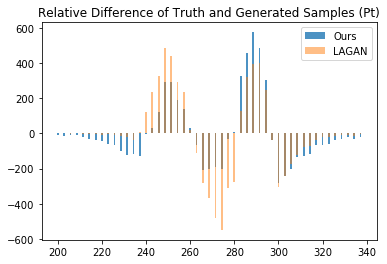

In [64]:
plt.bar(bins[:-1], pt_image - pt_samples, label='Ours',alpha=0.8)
plt.bar(bins[:-1], pt_image - pt_lagan, label='LAGAN',alpha=0.5 )
plt.legend()
plt.title('Relative Difference of Truth and Generated Samples (Pt)')

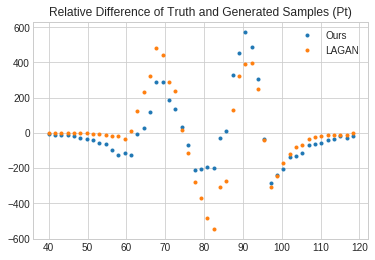

In [97]:
plt.plot(bins[:-1], pt_image - pt_samples, '.', label='Ours')
plt.plot(bins[:-1], pt_image - pt_lagan, '.', label='LAGAN')
plt.legend()
plt.title('Relative Difference of Truth and Generated Samples (Pt)')

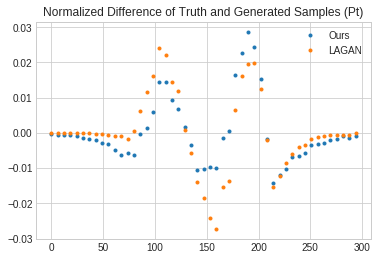

In [136]:
plt.plot(bins[:-1], (pt_image - pt_samples)/np.sum(pt_image), '.', label='Ours')
plt.plot(bins[:-1], (pt_image - pt_lagan)/np.sum(pt_image), '.', label='LAGAN')
# plt.
plt.legend()
# plt.ylim(-1,1)
plt.title('Normalized Difference of Truth and Generated Samples (Pt)')




# $\tau$

In [7]:
import plot_utils
plot_utils._tau1(image[:20000].reshape(20000,625))

20000


ValueError: operands could not be broadcast together with shapes (20000,625) (25,25) 

UnboundLocalError: local variable 'eta' referenced before assignment

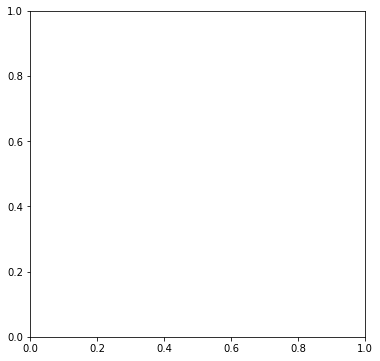

In [6]:
fig, ax = plt.subplots(figsize=(6, 6))
# bins = np.linspace(200, 340, 50)

pt_image, _, _ = plt.hist(tau21(image[:20000]), 
             bins=bins, histtype='step', label=r'Truth ($W->WD$)', normed=False, color='blue', linestyle='dashed')
pt_samples, _, _ = plt.hist(tau21(samples_bg), 
             bins=bins, histtype='step', label=r'Ours ($W->WD$)', normed=False, color='purple')
pt_lagan, _, _ = plt.hist(tau21(samples_lagan), 
             bins=bins, histtype='step', label=r'LAGAN ($W->WD$)', normed=False, color='green', linestyle='dashed')
plt.xlabel(r'Discretized $p_T$ of Jet Image')
plt.ylabel(r'Units normalized to unit area')
plt.legend()

# Pixelwise

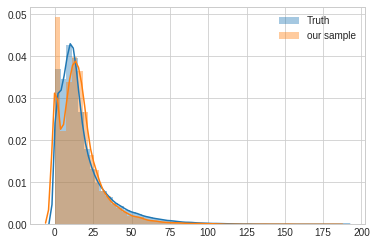

In [112]:
import seaborn as sns 
x=12
y=13

# samples_bg[samples_bg<0] = 0 #-samples_bg[samples_bg<0]

pixel_bg = samples_bg[:,x,y]
# pixel_bg[pixel_bg<0] = -pixel_bg[pixel_bg<0]
# pixel_bg = pixel_bg[pixel_bg>=0]
# pixel_bg = np.clip(pixel_bg, a_min=0, a_max=1e5)

pixel = image[:,x,y]
# pixel = pixel[pixel>=0]
pixel_lagan = samples_lagan[:,x,y]

x = np.linspace(0.0,200, 1000)
sns.distplot(pixel, label='Truth', bins=50)
sns.distplot(pixel_bg, label='our sample', bins=50)
# sns.distplot(pixel_lagan, label='lagan sample', bins=50)

plt.legend()



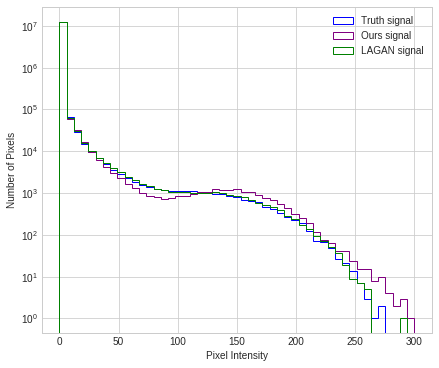

In [106]:
fig, ax = plt.subplots(figsize=(7, 6))

_, bins, _ = plt.hist(image[:20000].ravel(), 
           bins=np.linspace(0,300,50), histtype='step', label='Truth signal', color='blue')

_, bins, _ = plt.hist(samples_bg.ravel(),  # to make sure have same amount of samples
           bins=np.linspace(0,300,50), histtype='step', label='Ours signal', color='purple')

_, bins, _ = plt.hist(samples_lagan.ravel(), 
           bins=np.linspace(0,300,50), histtype='step', label='LAGAN signal', color='green')

plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.yscale('log')
plt.legend(loc='upper right')

In [50]:
print('overall sparsity: truth and samples:',
      np.where(image.ravel()==0)[0].shape[0] / image.ravel().shape[0],
      np.where(samples_bg.ravel()==0)[0].shape[0] / samples_bg.ravel().shape[0])


overall sparsity: truth and samples: 0.9046188521152423 0.9664888


In [1854]:
for y in range(0, 25):
    x = 12
    pixel = image[:,x,y]
    pixel_bg = samples_bg[:,x,y]
    print(np.where(pixel.ravel()==0)[0].shape[0] / pixel.ravel().shape[0],
         np.where(pixel_bg.ravel()==0)[0].shape[0] / pixel_bg.ravel().shape[0])

0.9998 1.0
0.9995 1.0
0.9991 1.0
0.9983 1.0
0.9949 1.0
0.9841 1.0
0.9556 1.0
0.8883 1.0
0.7593 1.0
0.5851 0.9398
0.471 0.71275
0.0189 0.13265
0.0102 0.01045
0.0128 0.11235
0.3225 0.63315
0.5014 0.8722
0.643 0.9952
0.7975 1.0
0.9019 1.0
0.9581 1.0
0.9822 1.0
0.9892 1.0
0.9955 1.0
0.9988 1.0
0.9991 1.0


In [1156]:
samples_bg.mean(axis=0)[11:14, 11:14]

array([[   2.16315316,   10.92984954,    6.490462  ],
       [   6.51890609,  114.99481613,   19.09287482],
       [   1.82201643,   12.79510431,    6.63102765]])

In [1157]:
image.mean(axis=0)[11:14, 11:14]

array([[   1.90851796,   13.12642097,    6.79488897],
       [   6.82761383,  110.55780792,   18.00856209],
       [   1.75371659,   12.20269966,    6.11074781]], dtype=float32)

In [1159]:
samples_lagan.mean(axis=0)[11:14, 11:14]

array([[   0.95250118,   12.159935  ,    8.50615501],
       [   5.98825836,  114.24207306,   21.09420395],
       [   2.89799595,   12.50446987,    3.31072712]], dtype=float32)

# $\chi^2$ test 

In [75]:
class ChiSquareTest(object):
    def __init__(self, bins, truth):
        self.bins = bins
        self.expectation = self.get_bin_count(truth, bins)

    def getChisquare(self, image):
        count = self.get_bin_count(image, self.bins)
        distance = 0
        for i in range(self.bins):
            for j in range(self.bins):
                if self.expectation[i,j] != 0.0:
                    distance += (count[i,j] - self.expectation[i,j])**2 / self.expectation[i,j]
        return distance, count

    def get_bin_count(self, image, bins):
        count = np.zeros((bins, bins))
        mass, pt = image[0], image[1]
        min_mass, max_mass, min_pt, max_pt = mass.min(), mass.max(), pt.min(), pt.max()
        bin_size_mass, bin_size_pt = (max_mass - min_mass) / bins + 1e-5, (max_pt - min_pt) / bins + 1e-5
        for i in range(image[0].shape[0]):
            id_mass, id_pt = int((mass[i] - min_mass) // bin_size_mass), int((pt[i] - min_pt) // bin_size_pt)
            count[id_mass, id_pt] += 1
        return count


In [100]:
bins = 10
mass, pt = discrete_mass(image[:20000]), discrete_pt(image[:20000])
chi2 = ChiSquareTest(bins=bins, truth=(mass, pt))

mass_ours, pt_ours = discrete_mass(samples_bg), discrete_pt(samples_bg)
distance_ours, count_ours = chi2.getChisquare((mass_ours, pt_ours))
print(distance_ours)
mass_lagan, pt_lagan = discrete_mass(samples_lagan), discrete_pt(samples_lagan)
distance_lagan, count_lagan = chi2.getChisquare((mass_lagan, pt_lagan))
distance_lagan

113364.471018


66426.184993418792

In [1]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18, 4.5))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

_x = np.arange(bins)
_y = np.arange(bins)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
bottom = np.zeros_like(x)
width = depth = 1

# ax1.scatter(x,y,count_truth.ravel(), c=count_truth.ravel())
ax1.bar3d(x, y, bottom, width, depth, count_truth.ravel(), color="yellow")
ax2.bar3d(x, y, bottom, width, depth, count_ours.ravel(), color="yellow")
ax3.bar3d(x, y, bottom, width, depth, count_lagan.ravel(), color="yellow")

ax1.set_title('truth')
ax2.set_title('ours')
ax3.set_title('lagan')

for ax in [ax1, ax2, ax3]:
    ax.set_zlim((0,6000))
    ax.set_xlabel('pt')
    ax.set_ylabel('mass')
    ax.set_zlabel('count')
    

plt.show()

NameError: name 'plt' is not defined

In [141]:
# ax1 = plt.axes(projection='3d')
# ax1.plot_surface(x, y, count_truth.ravel())
# ax1.set_title('surface')
# # plt.show()

In [3]:
import numpy as np
np.convolve([1, 2, 3], [0, 1, 0.5])

array([ 0. ,  1. ,  2.5,  4. ,  1.5])

In [9]:
np.convolve([1,2,3],[0,1], 'valid')

array([1, 2])